## Computer Vision

Let's do some very basic computer vision. We're going to import the MNIST handwritten digits data and $k$NN to predict values (i.e. "see/read").

1. To load the data, run the following code in a chunk:
```
from keras.datasets import mnist
df = mnist.load_data('minst.db')
train,test = df
X_train, y_train = train
X_test, y_test = test
```
The `y_test` and `y_train` vectors, for each index `i`, tell you want number is written in the corresponding index in `X_train[i]` and `X_test[i]`. The value of `X_train[i]` and `X_test[i]`, however, is a 28$\times$28 array whose entries contain values between 0 and 256. Each element of the matrix is essentially a "pixel" and the matrix encodes a representation of a number. To visualize this, run the following code to see the first ten numbers:
```
import matplotlib.pyplot as plt
import numpy as np
np.set_printoptions(edgeitems=30, linewidth=100000)
for i in range(5):
    print(y_test[i],'\n') # Print the label
    print(X_test[i],'\n') # Print the matrix of values
    plt.contourf(np.rot90(X_test[i].transpose())) # Make a contour plot of the matrix values
    plt.show()
```
OK, those are the data: Labels attached to handwritten digits encoded as a matrix.

2. What is the shape of `X_train` and `X_test`? What is the shape of `X_train[i]` and `X_test[i]` for each index `i`? What is the shape of `y_train` and `y_test`?
3. Use Numpy's `.reshape()` method to covert the training and testing data from a matrix into an vector of features. So, `X_test[index].reshape((1,784))` will convert the $index$-th element of `X_test` into a $28\times 28=784$-length row vector of values, rather than a matrix. Turn `X_train` into an $N \times 784$ matrix $X$ that is suitable for scikit-learn's kNN classifier where $N$ is the number of observations and $784=28*28$ (you could use, for example, a `for` loop).
4. Use the reshaped `X_test` and `y_test` data to create a $k$-nearest neighbor classifier of digit. What is the optimal number of neighbors $k$? If you can't determine this, play around with different values of $k$ for your classifier.
5. For the optimal number of neighbors, how well does your predictor perform on the test set? Report the accuracy, compute a confusion matrix, and explain your findings.
6. For your confusion matrix, which mistakes are most likely? Do you find any interesting patterns?
7. So, this is how computers "see." They convert an image into a matrix of values, that matrix becomes a vector in a dataset, and then we deploy ML tools on it as if it was any other kind of tabular data. To make sure you follow this, invent a way to represent a color photo in matrix form, and then describe how you could convert it into tabular data. (Hint: RGB color codes provide a method of encoding a numeric value that represents a color.)

In [1]:
from keras.datasets import mnist
df = mnist.load_data('minst.db')
train,test = df
X_train, y_train = train
X_test, y_test = test

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


7 

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0  84 185 159 151  60  36   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0 222 254 254 254 254 241 198 198 198 198 198 198 19

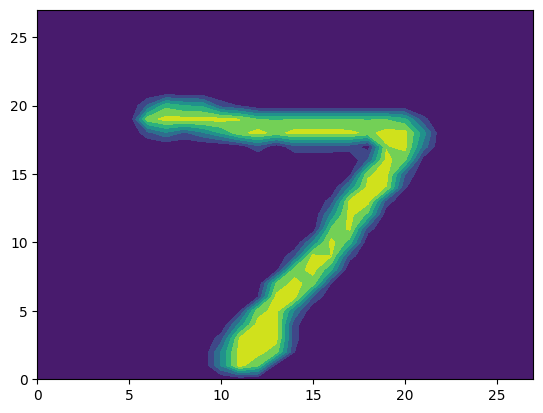

2 

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 116 125 171 255 255 150  93   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0 169 253 253 253 253 253 253 218  30   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0 169 253 253 253 213 142 176 253 253 122   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0  52 250 253 210  32  12   0   6 206 253 140   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0  77 251 210  25   0   0   0 122 248 253  65   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0  31  18   0   0   0   0 209 253 253  65   

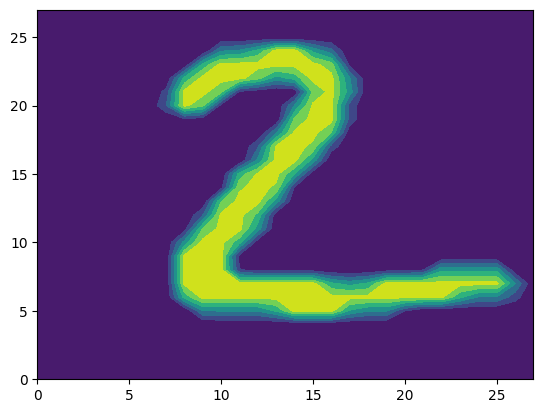

1 

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  38 254 109   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  87 252  82   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 135 241   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  45 244 150   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  84 254  63   

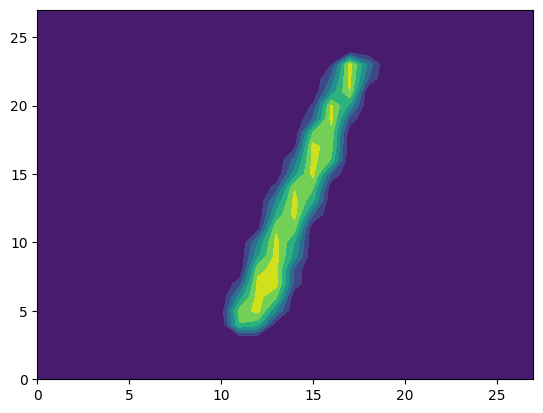

0 

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0  11 150 253 202  31   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0  37 251 251 253 107   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  21 197 251 251 253 107   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 110 190 251 251 251 253 169 109  62   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 253 251 251 251 251 253 251 251 22

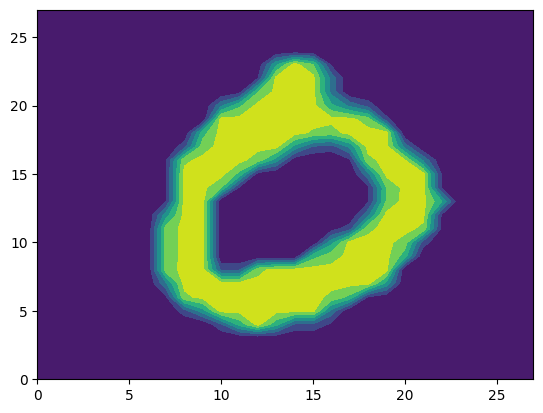

4 

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0  50 224   0   0   0   0   0   0   0  70  29   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 121 231   0   0   0   0   0   0   0 148 168   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   4 195 231   0   0   0   0   0   0   0  96 210  11   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0  69 252 134   0   0   0   0   0   0   

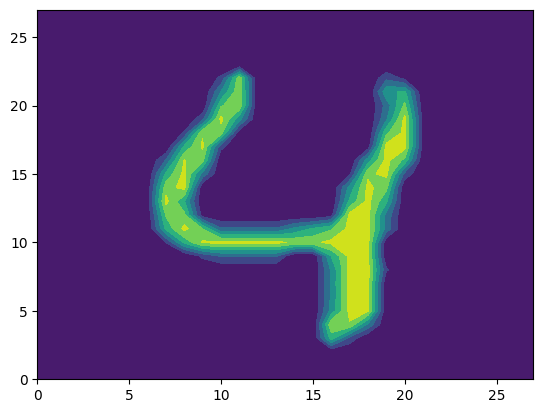

In [2]:
import matplotlib.pyplot as plt
import numpy as np
np.set_printoptions(edgeitems=30, linewidth=100000)
for i in range(5):
    print(y_test[i],'\n') # Print the label
    print(X_test[i],'\n') # Print the matrix of values
    plt.contourf(np.rot90(X_test[i].transpose())) # Make a contour plot of the matrix values
    plt.show()

In [4]:
# question 2:

print(X_train.shape)
print(X_test.shape)
print("\n")

for i in range(5):
  print(X_train[i].shape)
  print(X_test[i].shape)
  print("\n")

print(y_train.shape)
print(y_test.shape)

(60000, 28, 28)
(10000, 28, 28)


(28, 28)
(28, 28)


(28, 28)
(28, 28)


(28, 28)
(28, 28)


(28, 28)
(28, 28)


(28, 28)
(28, 28)


(60000,)
(10000,)


In [10]:
# question 3:

import pandas as pd
import numpy as np

# save the reshaped data and reload it

reload = 0 # first 1 then 0

if reload == 1:  # do reshaping

    Z_train = []
    for i in range(60000):
        row = X_train[i].reshape((1,784)) # matrix becomes row vector of features
        Z_train.append(row[0]) # add the row vectors to the list
    Z_train = pd.DataFrame(Z_train)
    Z_train.to_csv('Z_train.csv')

    Z_test = []
    for i in range(len(y_test)):
        row = X_test[i].reshape((1,784))
        Z_test.append(row[0])
    Z_test = pd.DataFrame(Z_test)
    Z_test.to_csv('Z_test.csv')

else: # if reload is not 1, then we just load the reshaped data
    Z_train = pd.read_csv('Z_train.csv')
    Z_test = pd.read_csv('Z_test.csv')

Current k:  1
Current k:  2
Current k:  3
Current k:  4
Current k:  5
Current k:  6
Current k:  7
Current k:  8
Current k:  9
Current k:  10
Current k:  11
Current k:  12
Current k:  13
Current k:  14
Current k:  15
Current k:  16
Current k:  17
Current k:  18
Current k:  19
Current k:  20
[1]


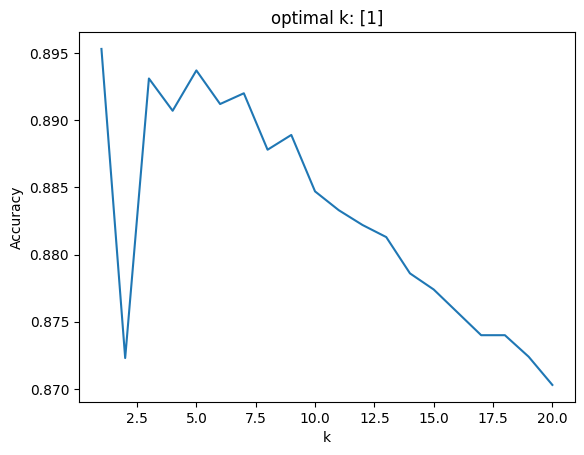

In [12]:
# question 4:

from sklearn.neighbors import KNeighborsClassifier

k_bar = 20
accuracy = []

for k in range(k_bar):
    print('Current k: ' , str(k+1))
    knn = KNeighborsClassifier(n_neighbors=k+1) # this makes the classifier instance
    predictor = knn.fit(Z_train.values,y_train) # fitting the model
    accuracy.append(predictor.score(Z_test.values,y_test) ) # storing accuracy

accuracy_max = np.max(accuracy) # highest recorded accuracy
max_index = np.where(accuracy==accuracy_max)[0]
k_star = max_index+1 # finding the optimal value of k
print(k_star)

plt.plot(np.arange(1,k_bar+1),accuracy) # plotting accuracy of k
plt.xlabel("k")
plt.title("optimal k: "+str(k_star))
plt.ylabel('Accuracy')
plt.show()

In [13]:
# question 5:

knn = KNeighborsClassifier(n_neighbors=1)
predictor = knn.fit(Z_train.values,y_train)
y_hat = predictor.predict(Z_test.values)

accuracy = knn.score(Z_test.values,y_test) # referred to sample solution; there is a bug in sklearn that requires us to add '.values' to our Z_test dataset
print('The accuracy of my predictor is: ', accuracy)

pd.crosstab(y_test, y_hat)

The accuracy of my predictor is:  0.8953


col_0,0,1,2,3,4,5,6,7,8,9
row_0,,,,,,,,,,
0,953,1,0,0,0,6,16,2,1,1
1,0,1126,3,2,0,0,3,1,0,0
2,25,41,883,22,2,5,9,31,11,3
3,3,8,16,880,1,48,5,14,23,12
4,2,19,1,0,858,1,6,10,4,81
5,11,9,0,45,10,750,26,5,19,17
6,18,5,1,0,7,3,920,2,2,0
7,0,39,7,3,7,1,0,933,0,38
8,18,11,13,50,7,45,16,8,773,33


From above, we can see that when k=3, the model is 89.53% accurate on the test set. The times when it's not accurate are mostly just errors like mistaking an 8 for a 3 or a 7 for a 1 which is still minimal.

Question 6:

The biggest mistakes are: confusing a 7 for a 9 (38 instances), a 7 for a 1 (39 instances), a 9 for a 7 (40 instances), an 8 for a 5 (45 instances), a 3 for a 5 (48 instances), an 8 for a 3 (50 instances), a 9 for a 4 (51 instances), and a 4 for a 9 (81 instances). I think these mistakes are made because they the pairs of numbers that are mixed up all look similar, so it makes sense that a computer reading those values could mistake one number for the other.

Question 7:

In our data, each pixel in the 28x28 grid has an "intensity" value. If we want to include color, we could store the 28x28 pixel image as a 28x28x3 matrix and the '3' in the z-position of the matrix would represent each of the RGB color intensity (defined by 0-255). Then we can reshape the matrix into a 1d vector with shape (1, 2352) since 28\*28\*3=2352 by flattening the image. This allows the data to be stored in one long row to create tabular data, like we previously did above.